In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


c:\Boyko Boev\Stock-Market-Prediction\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from lstm_model import build_model, train_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart
import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           68096     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
 reshape (Reshape)           (None, 3, 4)              0         
                                                                 
Total params: 120316 (469.98 KB)
Trainable params: 1203

---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data()

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

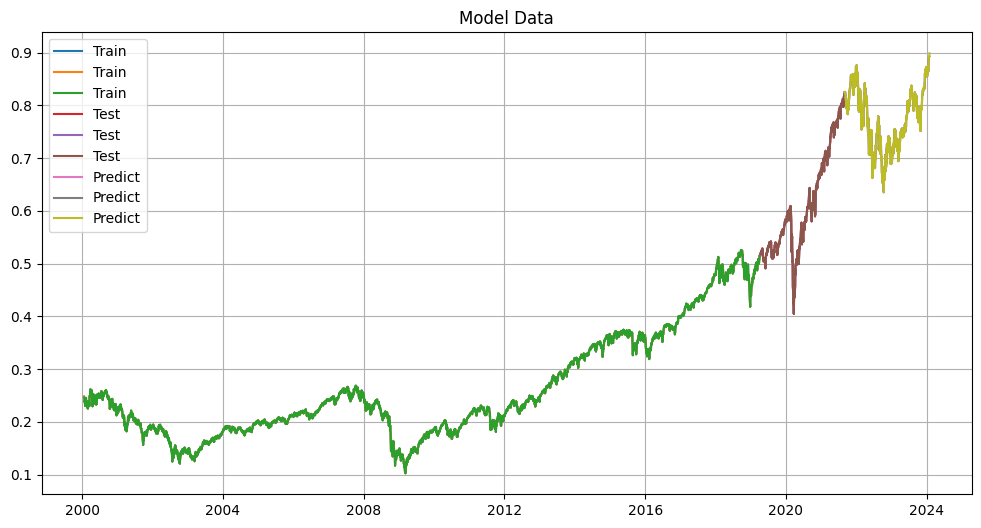

In [5]:
plt = config_chart('Model Data')
plt.plot(y_dates_train, y_train[:, :, 0])
plt.plot(y_dates_test, y_test[:, :, 0])
plt.plot(y_dates_predict, y_predict[:, :, 0])
plt.legend(['Train', 'Train', 'Train',  'Test', 'Test', 'Test', 'Predict', 'Predict', 'Predict'])

In [6]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)

Epoch 1/100


152/152 - 5s - loss: 0.0204 - mean_absolute_error: 0.0850 - 5s/epoch - 34ms/step
Epoch 2/100
152/152 - 1s - loss: 0.0014 - mean_absolute_error: 0.0203 - 1s/epoch - 9ms/step
Epoch 3/100
152/152 - 1s - loss: 4.1793e-04 - mean_absolute_error: 0.0141 - 1s/epoch - 9ms/step
Epoch 4/100
152/152 - 1s - loss: 2.5594e-04 - mean_absolute_error: 0.0114 - 1s/epoch - 9ms/step
Epoch 5/100
152/152 - 2s - loss: 1.4246e-04 - mean_absolute_error: 0.0088 - 2s/epoch - 12ms/step
Epoch 6/100
152/152 - 1s - loss: 9.2096e-05 - mean_absolute_error: 0.0073 - 1s/epoch - 10ms/step
Epoch 7/100
152/152 - 1s - loss: 5.5815e-05 - mean_absolute_error: 0.0056 - 1s/epoch - 10ms/step
Epoch 8/100
152/152 - 1s - loss: 4.9573e-05 - mean_absolute_error: 0.0052 - 1s/epoch - 9ms/step
Epoch 9/100
152/152 - 1s - loss: 5.8743e-05 - mean_absolute_error: 0.0058 - 1s/epoch - 9ms/step
Epoch 10/100
152/152 - 1s - loss: 4.2523e-05 - mean_absolute_error: 0.0048 - 1s/epoch - 9ms/step
Epoch 11/100
152/152 - 1s - loss: 4.3256e

Text(0, 0.5, 'Value')

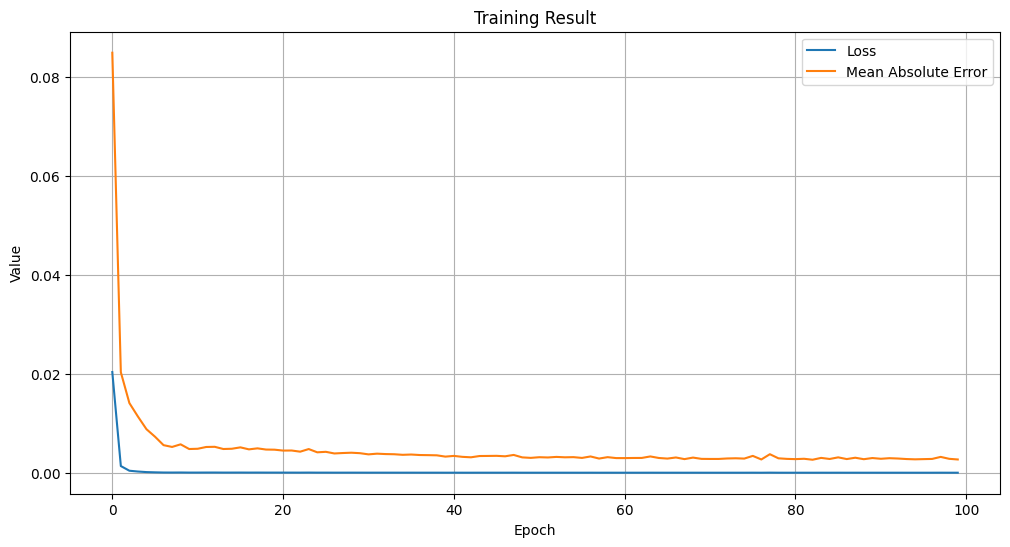

In [7]:
plt = config_chart('Training Result')
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['mean_absolute_error'])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.xlabel('Epoch')
plt.ylabel('Value')

In [8]:
model.save('./models/lstm_v2/lstm_model_v2')
model = tf.keras.models.load_model('./models/lstm_v2/lstm_model_v2')

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [9]:
predictions = model.predict(x_test)

19/19 [==============================] - 1s 5ms/step


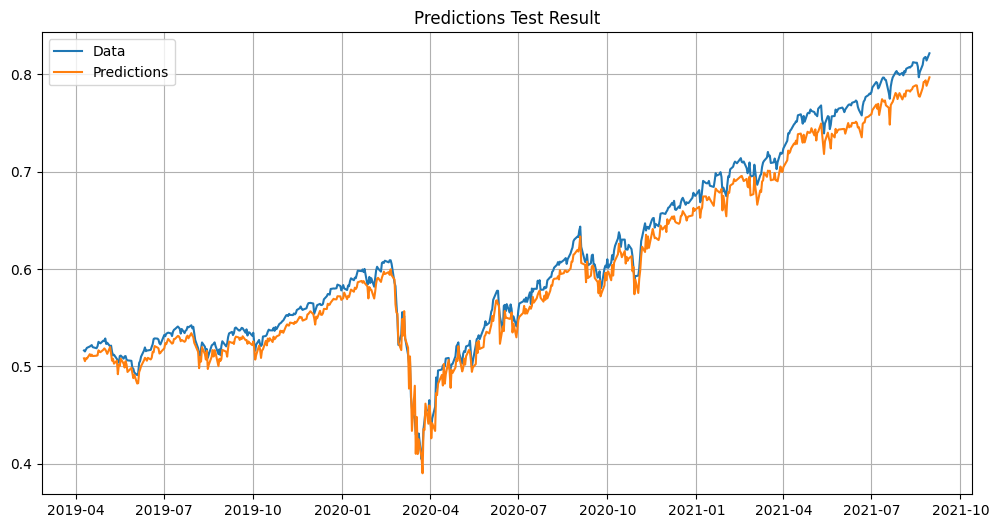

In [10]:
plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

In [11]:
predictions = model.predict(x_predict)

 1/19 [>.............................] - ETA: 0s

19/19 [==============================] - 0s 7ms/step


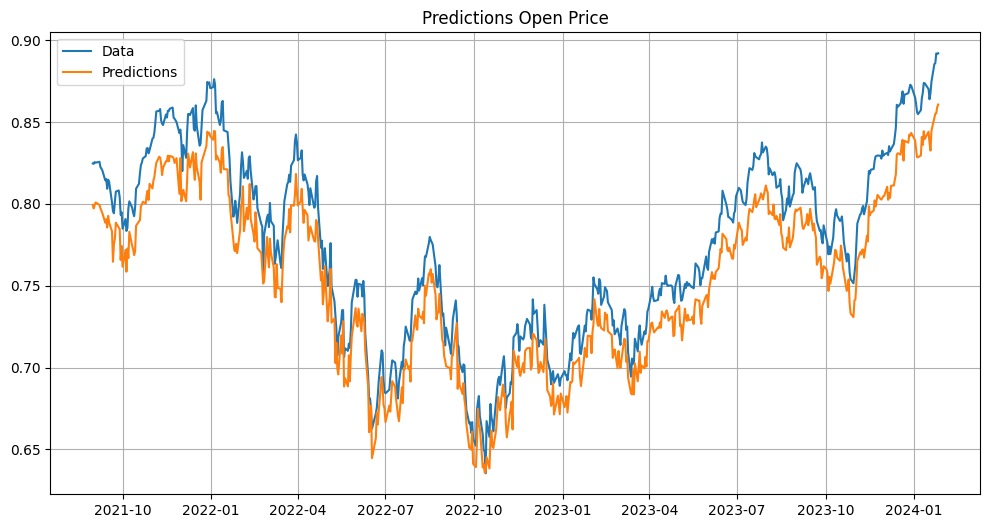

In [12]:
plt = config_chart('Predictions Open Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 0])
plt.legend(['Data', 'Predictions'])

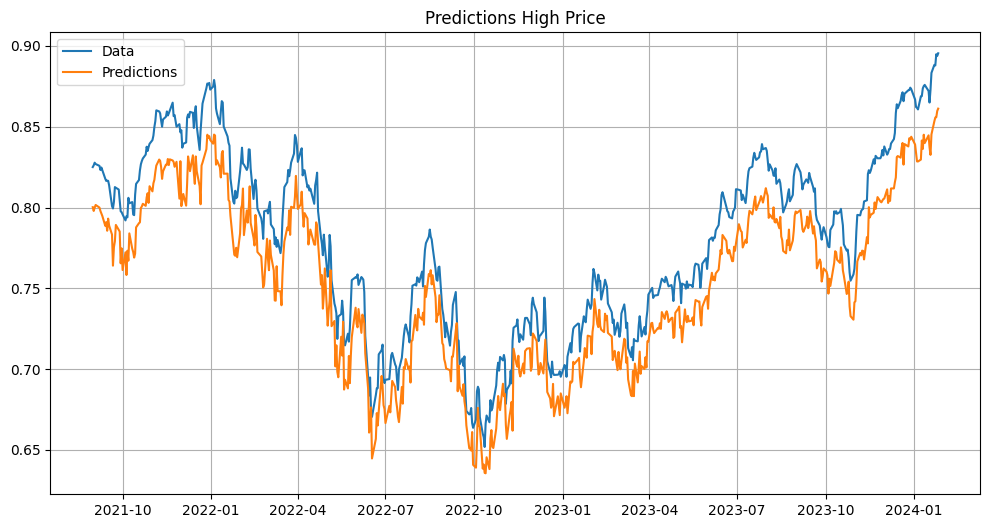

In [13]:
plt = config_chart('Predictions High Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 1])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 1])
plt.legend(['Data', 'Predictions'])

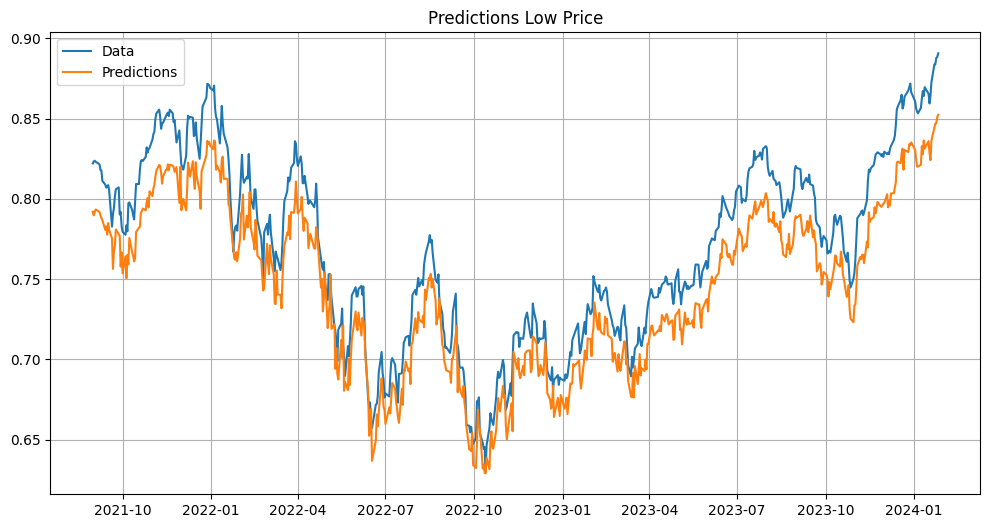

In [14]:
plt = config_chart('Predictions Low Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 2])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 2])
plt.legend(['Data', 'Predictions'])

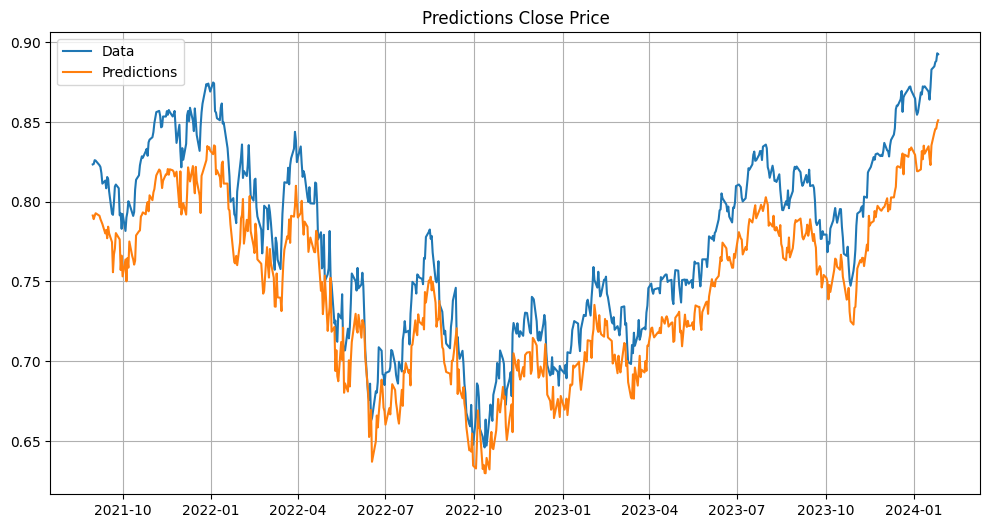

In [15]:
plt = config_chart('Predictions Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0, 3])
plt.plot(y_dates_predict[:, 0], predictions[:, 0, 3])
plt.legend(['Data', 'Predictions'])

In [16]:

predictions = model.predict(x_predict)

 1/19 [>.............................] - ETA: 0s

19/19 [==============================] - 0s 7ms/step


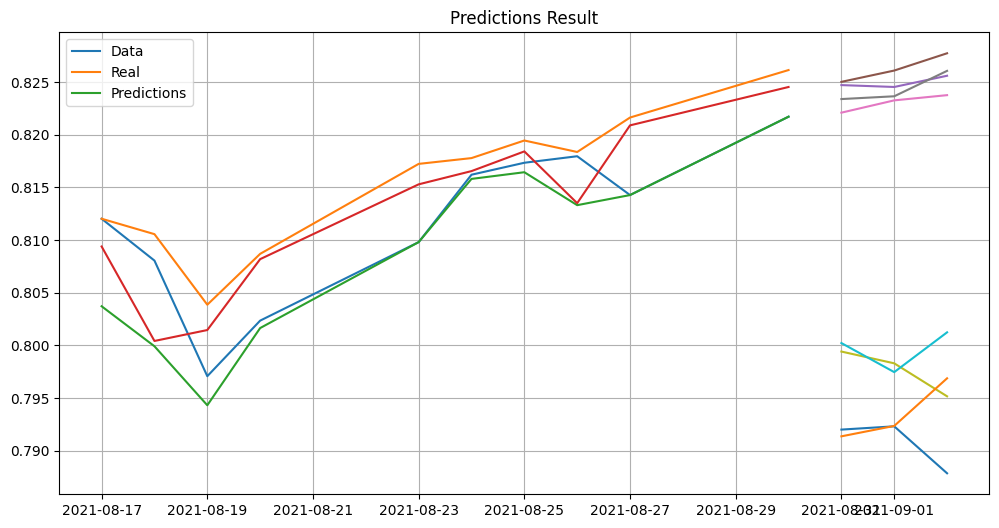

In [17]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index, : ])
plt.plot(y_dates_predict[index], y_predict[index, :])
plt.plot(y_dates_predict[index], predictions[index, :])
plt.legend(['Data', 'Real', 'Predictions'])